# Ex - GroupBy

Check out [Alcohol Consumption Exercises Video Tutorial](https://youtu.be/az67CMdmS6s) to watch a data scientist go through the exercises

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [2]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [3]:

drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv',keep_default_na=False, na_values=['_'])
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Step 4. Print beer servings average per continent

---



In [ ]:
beer_avg = drinks.groupby('continent').beer_servings.mean().reset_index()
print(beer_avg)

  continent  beer_servings
0        AF      61.471698
1        AS      37.045455
2        EU     193.777778
3        NA     145.434783
4        OC      89.687500
5        SA     175.083333


### Step 5. For each continent print the statistics for wine consumption.

In [ ]:
wine_stats = drinks.groupby('continent').wine_servings.describe()
print(wine_stats)

           count        mean        std  min   25%    50%     75%    max
continent                                                               
AF          53.0   16.264151  38.846419  0.0   1.0    2.0   13.00  233.0
AS          44.0    9.068182  21.667034  0.0   0.0    1.0    8.00  123.0
EU          45.0  142.222222  97.421738  0.0  59.0  128.0  195.00  370.0
NA          23.0   24.521739  28.266378  1.0   5.0   11.0   34.00  100.0
OC          16.0   35.625000  64.555790  0.0   1.0    8.5   23.25  212.0
SA          12.0   62.416667  88.620189  1.0   3.0   12.0   98.50  221.0


###Step 6. Print all countries with wine servings bigger than the median wine servings.

In [ ]:
median_wine_servings = drinks.wine_servings.median()
bigger_median = drinks[drinks['wine_servings'] > median_wine_servings]['country']
bigger_median



1                Albania
2                Algeria
3                Andorra
4                 Angola
5      Antigua & Barbuda
             ...        
180              Ukraine
182       United Kingdom
184                  USA
185              Uruguay
187              Vanuatu
Name: country, Length: 96, dtype: object

###Step 7. For each continent, print the country with the maximal beer consumption.

In [ ]:
max_beer_consumption = drinks.groupby('continent')['beer_servings'].idxmax().reset_index()
max_beer_consumption

,continent,beer_servings
0,AF,117
1,AS,141
2,EU,45
3,NA,130
4,OC,129
5,SA,188


###Step 8. We want to define an alcohol consumption rank. Create a new column created 'stars' such that for each country, if the total_litres_of_pure_alcohol is smaller than the 0.25 precentile of the column, it gets 4 stars. If it's between 0.25 - 0.5 precentile, it will get 3 stars, 0.5 - 0.75 is 2 stars and 0.75 - 0.1 is 1 star. Those values will be set in the new column.

In [38]:
q1 = drinks['total_litres_of_pure_alcohol'].quantile(0.25)
q2 = drinks['total_litres_of_pure_alcohol'].quantile(0.5)
q3 = drinks['total_litres_of_pure_alcohol'].quantile(0.75)

def alcohol_rating(total_litres):
    if total_litres < q1:
        return 4
    elif total_litres < q2:
        return 3
    elif total_litres < q3:
        return 2
    else:
        return 1

drinks.stars = drinks['total_litres_of_pure_alcohol'].apply(alcohol_rating)

drinks[['country','total_litres_of_pure_alcohol','stars']]


,country,total_litres_of_pure_alcohol,stars
0,Afghanistan,0.0,4
1,Albania,4.9,2
2,Algeria,0.7,4
3,Andorra,12.4,1
4,Angola,5.9,2
...,...,...,...
188,Venezuela,7.7,1
189,Vietnam,2.0,3
190,Yemen,0.1,4
191,Zambia,2.5,3


### Step 9. For shaming purposes, change the value of the column stars such that the country with the biggest alcohol consumption will have the value "WORST!" in it.

In [ ]:
max_index = drinks['total_litres_of_pure_alcohol'].idxmax()

drinks.loc[max_index,'stars'] = "WORST!"
drinks[15::]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,stars
15,Belarus,142,373,42,14.4,EU,WORST!
16,Belgium,295,84,212,10.5,EU,1
17,Belize,263,114,8,6.8,NA,2
18,Benin,34,4,13,1.1,AF,4
19,Bhutan,23,0,0,0.4,AS,4
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,1
189,Vietnam,111,2,1,2.0,AS,3
190,Yemen,6,0,0,0.1,AS,4
191,Zambia,32,19,4,2.5,AF,3


### Step 10. Perform the same as question 8 but for the continents total_litres_of_pure_alcohol mean

In [48]:
continent_means = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

q1, q2, q3 = continent_means.quantile([0.25, 0.5, 0.75])

drinks.continent_stars =drinks.continent.map(continent_means.apply(lambda q: 
                                                  4 if q < q1 
                                                  else 3 if q < q2 
                                                  else 2 if q < q3 
                                                  else 1))
drinks[['continent','country','total_litres_of_pure_alcohol','continent_stars']].sort_values('continent')


,continent,country,total_litres_of_pure_alcohol,continent_stars
96,AF,Liberia,3.1,4
104,AF,Mali,0.6,4
101,AF,Malawi,1.5,4
100,AF,Madagascar,0.8,4
97,AF,Libya,0.0,4
...,...,...,...,...
23,SA,Brazil,7.2,1
37,SA,Colombia,4.2,1
6,SA,Argentina,8.3,1
185,SA,Uruguay,6.6,1


### Step 11. Perform the same as question 8 but for the continents total_litres_of_pure_alcohol mean

### Step 12. Drop the column stars from the dataframe.

In [62]:
#drinks = drinks.drop('stars',axis=1)
#drinks = drinks.drop('continent_stars',axis=1)


### Step 13. Create a new DataFrame called only_alcohol containing only the columns 'country','total_litres_of_pure_alcohol','continent'

In [5]:
 only_alcohol = drinks[['country','total_litres_of_pure_alcohol','continent']]
 only_alcohol

,country,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,AS
1,Albania,4.9,EU
2,Algeria,0.7,AF
3,Andorra,12.4,EU
4,Angola,5.9,AF
...,...,...,...
188,Venezuela,7.7,SA
189,Vietnam,2.0,AS
190,Yemen,0.1,AS
191,Zambia,2.5,AF


### Step 14. Set the index of the table only_alcohol to country.

In [8]:
only_alcohol = only_alcohol.set_index('country')


,total_litres_of_pure_alcohol,continent
country,,
Afghanistan,0.0,AS
Albania,4.9,EU
Algeria,0.7,AF
Andorra,12.4,EU
Angola,5.9,AF
...,...,...
Venezuela,7.7,SA
Vietnam,2.0,AS
Yemen,0.1,AS


##Part 2
Let's use another dataframe.
Import the dataset from this [address](https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv).



### Step 1. Read the dataset into a dataframe named stocks, convert the date column to type datetime and set the it to be the index of the table 

In [17]:
import pandas as pd
stocks = pd.read_csv('https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv')

stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.dtypes

stocks = stocks.set_index('Date')
stocks.head(10).sort_values('Date')


,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931
2013-01-09,14817,7995,6821,2888,9766,7311,2455,27471
2014-04-02,3155,938,2217,265,3379,3129,250,6799
2014-04-09,5761,2080,3681,1482,1609,1448,161,8852
2014-04-16,2286,634,1652,1186,633,604,29,4105



### Step 2. Print the total equity for each month (instead of each week as it  currently is) 

In [31]:
Total_M = stocks.resample('M')['Total'].sum()
Total_M


Date
2012-12-31   -15782
2013-01-31    18540
2013-02-28        0
2013-03-31        0
2013-04-30        0
2013-05-31        0
2013-06-30        0
2013-07-31        0
2013-08-31        0
2013-09-30        0
2013-10-31        0
2013-11-30        0
2013-12-31        0
2014-01-31        0
2014-02-28        0
2014-03-31        0
2014-04-30    24267
2014-05-31    14736
2014-06-30    16621
2014-07-31     3122
2014-08-31     5723
2014-09-30     2816
2014-10-31        0
2014-11-30    12502
2014-12-31        0
2015-01-31    12569
2015-02-28    16359
2015-03-31    17657
2015-04-30     1772
Freq: M, Name: Total, dtype: int64

### Step 3. Print the mean Taxable Bond for each month 

In [14]:
Taxable_Bond_M = stocks.resample('M')['Taxable Bond'].mean()
Taxable_Bond_M 


Date
2012-12-31    3153.25
2013-01-31    4707.00
2013-02-28        NaN
2013-03-31        NaN
2013-04-30        NaN
2013-05-31        NaN
2013-06-30        NaN
2013-07-31        NaN
2013-08-31        NaN
2013-09-30        NaN
2013-10-31        NaN
2013-11-30        NaN
2013-12-31        NaN
2014-01-31        NaN
2014-02-28        NaN
2014-03-31        NaN
2014-04-30    1438.60
2014-05-31    2548.00
2014-06-30    1887.75
2014-07-31    2342.00
2014-08-31    -253.25
2014-09-30    1239.50
2014-10-31        NaN
2014-11-30    2891.50
2014-12-31        NaN
2015-01-31     690.50
2015-02-28    3721.50
2015-03-31    1816.75
2015-04-30     257.00
Freq: M, Name: Taxable Bond, dtype: float64

### Step 4. What is the difference in days between the first row to the last (chronologically).

In [25]:
difference_in_days = (stocks.index[-1] - stocks.index[0]).days
difference_in_days

854

### Step 5. Print plot of the column Total over time

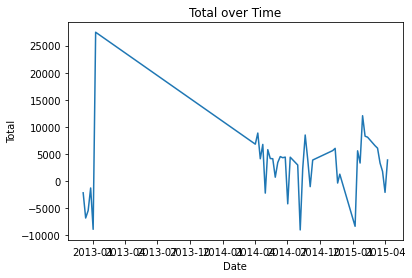

In [47]:
import matplotlib.pyplot as plt

plt.plot(stocks.index, stocks['Total'])
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Total over Time')
plt.show()




